In [0]:
# Import necessary packages

%matplotlib inline

import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

In [2]:
from torch import nn, optim
from torch.autograd import Variable
from torchvision import datasets, transforms
import torch.nn.functional as F

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor()])

# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
torch.manual_seed(101)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size= 100, shuffle= False)

0it [00:00, ?it/s]

9920512it [00:01, 9390841.12it/s]                            


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 142809.15it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw


1654784it [00:00, 2352316.40it/s]                            
0it [00:00, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


8192it [00:00, 51692.18it/s]            

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


In [3]:
print(f"len of trainSet {len(trainset)} , len of testSet {len(testset)}")

len of trainSet 60000 , len of testSet 10000


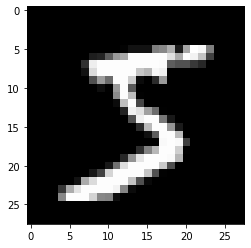

In [4]:
plt.imshow(trainset[0][0].reshape((28,28)), cmap="gray");

### 1 Layer Network with ReLU Activation

In [5]:
# Without Dropout
from torch import optim

torch.manual_seed(101)
model_1layer=nn.Sequential(
    nn.Linear(784,256),
    nn.ReLU(),
    nn.Linear(256,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
# Define loss function & optimizer
criterion = nn.CrossEntropyLoss()
optimizer_1layer=optim.SGD(model_1layer.parameters(), lr=0.01)

print("Model without dropout:",model_1layer)

# With Dropout

model_drop_1layer= nn.Sequential(
    nn.Linear(784,256),
    torch.nn.Dropout(0.2),
    nn.ReLU(),
    nn.Linear(256,64),
    torch.nn.Dropout(0.2),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
optimizer_drop_1layer=optim.SGD(model_drop_1layer.parameters(), lr=0.01)
print("Model with dropout:",model_drop_1layer)

Model without dropout: Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)
Model with dropout: Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): Dropout(p=0.2, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=64, bias=True)
  (4): Dropout(p=0.2, inplace=False)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax()
)


In [6]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

count_parameters(model_1layer)

200704
   256
 16384
    64
   640
    10
______
218058


In [7]:
import time
start_time = time.time()

epochs = 10
# Without dropout
train_losses,test_losses=[],[]
train_correct,test_correct = [],[]
acc =[]

for i in range(epochs):
    train = 0
    test = 0
    runningloss = 0

    # Run the training batches on model without dropout
    for b, (X_train, y_train) in enumerate(trainloader):
        b+=1
        
        # Apply the model
        y_pred = model_1layer(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train += batch_corr
        
        # Update parameters
        optimizer_1layer.zero_grad()
        loss.backward()
        optimizer_1layer.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  accuracy: {train.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(train)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(testloader):

            # Apply the model
            y_val = model_1layer(X_test.view(len(X_test), -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(test)

    
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:  0  batch:  200 [ 20000/60000]  loss: 2.23346734  accuracy:  26.950%
epoch:  0  batch:  400 [ 40000/60000]  loss: 2.03533053  accuracy:  38.227%
epoch:  0  batch:  600 [ 60000/60000]  loss: 1.59038711  accuracy:  45.373%
epoch:  1  batch:  200 [ 20000/60000]  loss: 1.10846281  accuracy:  70.140%
epoch:  1  batch:  400 [ 40000/60000]  loss: 0.84866494  accuracy:  74.002%
epoch:  1  batch:  600 [ 60000/60000]  loss: 0.53576815  accuracy:  76.680%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.52371842  accuracy:  84.615%
epoch:  2  batch:  400 [ 40000/60000]  loss: 0.51207304  accuracy:  85.353%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.32794735  accuracy:  85.928%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.34750146  accuracy:  87.615%
epoch:  3  batch:  400 [ 40000/60000]  loss: 0.41872269  accuracy:  87.970%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.52550006  accuracy:  88.355%
epoch:  4  batch:  200 [ 20000/60000]  loss: 0.52991581  accuracy:  89.060%
epoch:  4  b

In [8]:
#With dropout
start_time = time.time()
print(" Repeating the above steps on model with dropout 0.2")
epochs = 10
train_losses_d,test_losses_d=[],[]
train_correct_d,test_correct_d = [],[]
acc_d =[]
for i in range(epochs):
    train_d = 0
    test_d = 0
    runningloss_d = 0
    
    
    # Run the training batches on model with dropout
    for b, (X_train, y_train) in enumerate(trainloader):
        b+=1
        
        # Apply the model
        y_pred_d = model_drop_1layer(X_train.view(100, -1))  # Here we flatten X_train
        loss_d = criterion(y_pred_d, y_train)
 
        # Tally the number of correct predictions
        predicted_d = torch.max(y_pred_d.data, 1)[1]
        batch_corr_d = (predicted_d == y_train).sum()
        train_d += batch_corr_d
        
        # Update parameters
        optimizer_drop_1layer.zero_grad()
        loss_d.backward()
        optimizer_drop_1layer.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss_d.item():10.8f}  accuracy: {train_d.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses_d.append(loss_d)
    train_correct_d.append(train_d)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(testloader):

            # Apply the model
            y_val = model_drop_1layer(X_test.view(len(X_test), -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted_d = torch.max(y_val.data, 1)[1] 
            test_d += (predicted_d == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss_d = criterion(y_val, y_test)
    test_losses_d.append(loss_d)
    test_correct_d.append(test_d)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

 Repeating the above steps on model with dropout 0.2
epoch:  0  batch:  200 [ 20000/60000]  loss: 2.23652577  accuracy:  17.930%
epoch:  0  batch:  400 [ 40000/60000]  loss: 2.06832004  accuracy:  30.277%
epoch:  0  batch:  600 [ 60000/60000]  loss: 1.66381335  accuracy:  38.667%
epoch:  1  batch:  200 [ 20000/60000]  loss: 1.19470358  accuracy:  64.995%
epoch:  1  batch:  400 [ 40000/60000]  loss: 0.91857123  accuracy:  68.108%
epoch:  1  batch:  600 [ 60000/60000]  loss: 0.59512812  accuracy:  70.550%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.69556582  accuracy:  78.135%
epoch:  2  batch:  400 [ 40000/60000]  loss: 0.61799318  accuracy:  79.132%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.53534091  accuracy:  80.027%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.52449238  accuracy:  83.290%
epoch:  3  batch:  400 [ 40000/60000]  loss: 0.46352813  accuracy:  83.847%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.52885050  accuracy:  84.307%
epoch:  4  batch:  200 [ 20000/6000

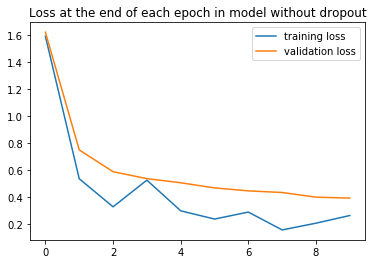

In [9]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch in model without dropout')
plt.legend();

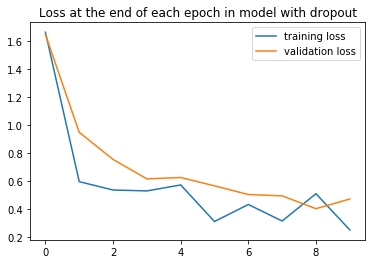

In [10]:
plt.plot(train_losses_d, label='training loss')
plt.plot(test_losses_d, label='validation loss')
plt.title('Loss at the end of each epoch in model with dropout')
plt.legend();

In [11]:
# Test Accuracy
print(test_correct) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(6463), tensor(8386), tensor(8798), tensor(8939), tensor(9016), tensor(9092), tensor(9124), tensor(9159), tensor(9212), tensor(9244)]

Test accuracy: 92.440%


In [12]:
# However, we'd like to compare the predicted values to the ground truth (the y_test labels), so we'll run the test set through the trained model all at once.

# Extract the data all at once, not in batches
test_load_all = torch.utils.data.DataLoader(testset, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model_1layer(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(testset)} = {correct.item()*100/(len(testset)):7.3f}%')

Test accuracy: 9244/10000 =  92.440%


In [13]:
# Test Accuracy
print(test_correct_d) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct_d[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(6117), tensor(7743), tensor(8328), tensor(8624), tensor(8729), tensor(8840), tensor(8903), tensor(9005), tensor(9057), tensor(9082)]

Test accuracy: 90.820%


In [14]:
# However, we'd like to compare the predicted values to the ground truth (the y_test labels), so we'll run the test set through the trained model all at once.

# Extract the data all at once, not in batches
test_load_all = torch.utils.data.DataLoader(testset, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model_drop_1layer(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(testset)} = {correct.item()*100/(len(testset)):7.3f}%')

Test accuracy: 9093/10000 =  90.930%


### 2 Layer Network with ReLU Activation

In [15]:
# Without Dropout

torch.manual_seed(101)
model_2layer=nn.Sequential(
    nn.Linear(784,256),
    nn.ReLU(),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
# Define loss function & optimizer
criterion = nn.CrossEntropyLoss()
optimizer=optim.SGD(model_2layer.parameters(), lr=0.01)

print("Model without dropout:",model_2layer)

# With Dropout

model_drop_2layer= nn.Sequential(
    nn.Linear(784,256),
    torch.nn.Dropout(0.2),
    nn.ReLU(),
    nn.Linear(256,128),
    torch.nn.Dropout(0.2),
    nn.ReLU(),
    nn.Linear(128,64),
    torch.nn.Dropout(0.2),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
optimizer_drop=optim.SGD(model_drop_2layer.parameters(), lr=0.01)
print("Model with dropout:",model_drop_2layer)

Model without dropout: Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax()
)
Model with dropout: Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): Dropout(p=0.2, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): Dropout(p=0.2, inplace=False)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): Dropout(p=0.2, inplace=False)
  (8): ReLU()
  (9): Linear(in_features=64, out_features=10, bias=True)
  (10): LogSoftmax()
)


In [16]:
count_parameters(model_2layer)

200704
   256
 32768
   128
  8192
    64
   640
    10
______
242762


In [17]:
# Flattening the train data
dataiter = iter(trainloader)
images, labels = dataiter.next()
print('Batch shape:', images.size())

Batch shape: torch.Size([100, 1, 28, 28])


In [18]:
images.view(100,-1).size()

torch.Size([100, 784])

In [19]:
start_time = time.time()

epochs = 10
# Without dropout
train_losses,test_losses=[],[]
train_correct,test_correct = [],[]
acc =[]

for i in range(epochs):
    train = 0
    test = 0
    runningloss = 0

    # Run the training batches on model without dropout
    for b, (X_train, y_train) in enumerate(trainloader):
        b+=1
        
        # Apply the model
        y_pred = model_2layer(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  accuracy: {train.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(train)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(testloader):

            # Apply the model
            y_val = model_2layer(X_test.view(len(X_test), -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(test)

    
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:  0  batch:  200 [ 20000/60000]  loss: 2.28464723  accuracy:  11.455%
epoch:  0  batch:  400 [ 40000/60000]  loss: 2.26160812  accuracy:  15.320%
epoch:  0  batch:  600 [ 60000/60000]  loss: 2.22960305  accuracy:  20.000%
epoch:  1  batch:  200 [ 20000/60000]  loss: 2.12290335  accuracy:  44.830%
epoch:  1  batch:  400 [ 40000/60000]  loss: 1.81436145  accuracy:  48.097%
epoch:  1  batch:  600 [ 60000/60000]  loss: 1.20119429  accuracy:  52.768%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.95671767  accuracy:  72.085%
epoch:  2  batch:  400 [ 40000/60000]  loss: 0.73457628  accuracy:  74.853%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.65003085  accuracy:  76.948%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.52507651  accuracy:  83.505%
epoch:  3  batch:  400 [ 40000/60000]  loss: 0.49688798  accuracy:  84.498%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.43900105  accuracy:  85.267%
epoch:  4  batch:  200 [ 20000/60000]  loss: 0.33709332  accuracy:  87.495%
epoch:  4  b

In [20]:
#With dropout
start_time = time.time()
print(" Repeating the above steps on model with dropout 0.2")
epochs = 10
train_losses_d,test_losses_d=[],[]
train_correct_d,test_correct_d = [],[]
acc_d =[]
for i in range(epochs):
    train_d = 0
    test_d = 0
    runningloss_d = 0
    
    
    # Run the training batches on model with dropout
    for b, (X_train, y_train) in enumerate(trainloader):
        b+=1
        
        # Apply the model
        y_pred_d = model_drop_2layer(X_train.view(100, -1))  # Here we flatten X_train
        loss_d = criterion(y_pred_d, y_train)
 
        # Tally the number of correct predictions
        predicted_d = torch.max(y_pred_d.data, 1)[1]
        batch_corr_d = (predicted_d == y_train).sum()
        train_d += batch_corr_d
        
        # Update parameters
        optimizer_drop.zero_grad()
        loss_d.backward()
        optimizer_drop.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss_d.item():10.8f}  accuracy: {train_d.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses_d.append(loss_d)
    train_correct_d.append(train_d)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(testloader):

            # Apply the model
            y_val = model_drop_2layer(X_test.view(len(X_test), -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted_d = torch.max(y_val.data, 1)[1] 
            test_d += (predicted_d == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss_d = criterion(y_val, y_test)
    test_losses_d.append(loss_d)
    test_correct_d.append(test_d)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

 Repeating the above steps on model with dropout 0.2
epoch:  0  batch:  200 [ 20000/60000]  loss: 2.28879023  accuracy:  11.205%
epoch:  0  batch:  400 [ 40000/60000]  loss: 2.28721929  accuracy:  12.030%
epoch:  0  batch:  600 [ 60000/60000]  loss: 2.26138210  accuracy:  14.717%
epoch:  1  batch:  200 [ 20000/60000]  loss: 2.16455722  accuracy:  31.870%
epoch:  1  batch:  400 [ 40000/60000]  loss: 1.96256697  accuracy:  35.248%
epoch:  1  batch:  600 [ 60000/60000]  loss: 1.64259219  accuracy:  38.195%
epoch:  2  batch:  200 [ 20000/60000]  loss: 1.32990789  accuracy:  50.890%
epoch:  2  batch:  400 [ 40000/60000]  loss: 1.08678532  accuracy:  55.065%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.82484573  accuracy:  58.743%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.78737473  accuracy:  71.045%
epoch:  3  batch:  400 [ 40000/60000]  loss: 0.74937403  accuracy:  72.998%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.87554628  accuracy:  74.297%
epoch:  4  batch:  200 [ 20000/6000

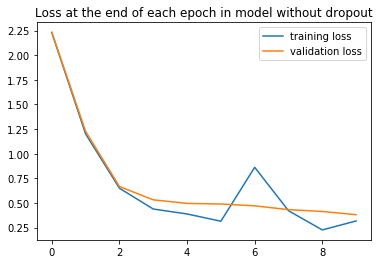

In [21]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch in model without dropout')
plt.legend();

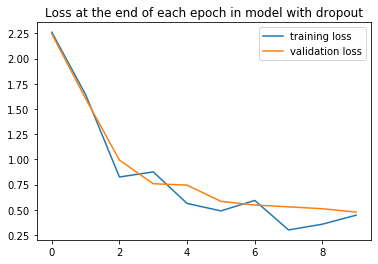

In [22]:
plt.plot(train_losses_d, label='training loss')
plt.plot(test_losses_d, label='validation loss')
plt.title('Loss at the end of each epoch in model with dropout')
plt.legend();

In [23]:
# Test Accuracy
print(test_correct) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(3595), tensor(6882), tensor(8273), tensor(8732), tensor(8883), tensor(8983), tensor(9030), tensor(9143), tensor(9185), tensor(9236)]

Test accuracy: 92.360%


In [24]:
# However, we'd like to compare the predicted values to the ground truth (the y_test labels), so we'll run the test set through the trained model all at once.

# Extract the data all at once, not in batches
test_load_all = torch.utils.data.DataLoader(testset, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model_2layer(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(testset)} = {correct.item()*100/(len(testset)):7.3f}%')

Test accuracy: 9236/10000 =  92.360%


In [25]:
# Test Accuracy
print(test_correct_d) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct_d[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(2707), tensor(4809), tensor(6911), tensor(7942), tensor(8370), tensor(8603), tensor(8733), tensor(8833), tensor(8923), tensor(8970)]

Test accuracy: 89.700%


In [26]:
# However, we'd like to compare the predicted values to the ground truth (the y_test labels), so we'll run the test set through the trained model all at once.

# Extract the data all at once, not in batches
test_load_all = torch.utils.data.DataLoader(testset, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model_drop_2layer(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(testset)} = {correct.item()*100/(len(testset)):7.3f}%')

Test accuracy: 8974/10000 =  89.740%


## 1Layer Network with Sigmoid Activation

In [27]:
# Without Dropout

torch.manual_seed(101)
model_1layer_s=nn.Sequential(
    nn.Linear(784,256),
    nn.Sigmoid(),
    nn.Linear(256,64),
    nn.Sigmoid(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
# Define loss function & optimizer
criterion = nn.CrossEntropyLoss()
optimizer_1layer_s=optim.SGD(model_1layer_s.parameters(), lr=0.01)

print("Model without dropout:",model_1layer_s)

# With Dropout

model_drop_1layer_s= nn.Sequential(
    nn.Linear(784,256),
    torch.nn.Dropout(0.2),
    nn.Sigmoid(),
    nn.Linear(256,64),
    torch.nn.Dropout(0.2),
    nn.Sigmoid(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
optimizer_drop_1layer_s=optim.SGD(model_drop_1layer_s.parameters(), lr=0.01)
print("Model with dropout:",model_drop_1layer_s)

Model without dropout: Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=256, out_features=64, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)
Model with dropout: Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): Dropout(p=0.2, inplace=False)
  (2): Sigmoid()
  (3): Linear(in_features=256, out_features=64, bias=True)
  (4): Dropout(p=0.2, inplace=False)
  (5): Sigmoid()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax()
)


In [28]:
start_time = time.time()

epochs = 10
# Without dropout
train_losses,test_losses=[],[]
train_correct,test_correct = [],[]
acc =[]

for i in range(epochs):
    train = 0
    test = 0
    runningloss = 0

    # Run the training batches on model without dropout
    for b, (X_train, y_train) in enumerate(trainloader):
        b+=1
        
        # Apply the model
        y_pred = model_1layer_s(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train += batch_corr
        
        # Update parameters
        optimizer_1layer_s.zero_grad()
        loss.backward()
        optimizer_1layer_s.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  accuracy: {train.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(train)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(testloader):

            # Apply the model
            y_val = model_1layer_s(X_test.view(len(X_test), -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(test)

    
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:  0  batch:  200 [ 20000/60000]  loss: 2.30406404  accuracy:  10.905%
epoch:  0  batch:  400 [ 40000/60000]  loss: 2.30169559  accuracy:  11.170%
epoch:  0  batch:  600 [ 60000/60000]  loss: 2.29780436  accuracy:  11.143%
epoch:  1  batch:  200 [ 20000/60000]  loss: 2.29471111  accuracy:  11.375%
epoch:  1  batch:  400 [ 40000/60000]  loss: 2.28774357  accuracy:  11.502%
epoch:  1  batch:  600 [ 60000/60000]  loss: 2.29218006  accuracy:  11.477%
epoch:  2  batch:  200 [ 20000/60000]  loss: 2.29536128  accuracy:  11.215%
epoch:  2  batch:  400 [ 40000/60000]  loss: 2.29415154  accuracy:  11.543%
epoch:  2  batch:  600 [ 60000/60000]  loss: 2.29764414  accuracy:  11.515%
epoch:  3  batch:  200 [ 20000/60000]  loss: 2.29130149  accuracy:  12.080%
epoch:  3  batch:  400 [ 40000/60000]  loss: 2.27751446  accuracy:  11.797%
epoch:  3  batch:  600 [ 60000/60000]  loss: 2.29222083  accuracy:  11.753%
epoch:  4  batch:  200 [ 20000/60000]  loss: 2.27904034  accuracy:  13.495%
epoch:  4  b

In [29]:
#With dropout
start_time = time.time()
print(" Repeating the above steps on model with dropout 0.2")
epochs = 10
train_losses_d,test_losses_d=[],[]
train_correct_d,test_correct_d = [],[]
acc_d =[]
for i in range(epochs):
    train_d = 0
    test_d = 0
    runningloss_d = 0
    
    
    # Run the training batches on model with dropout
    for b, (X_train, y_train) in enumerate(trainloader):
        b+=1
        
        # Apply the model
        y_pred_d = model_drop_1layer_s(X_train.view(100, -1))  # Here we flatten X_train
        loss_d = criterion(y_pred_d, y_train)
 
        # Tally the number of correct predictions
        predicted_d = torch.max(y_pred_d.data, 1)[1]
        batch_corr_d = (predicted_d == y_train).sum()
        train_d += batch_corr_d
        
        # Update parameters
        optimizer_drop_1layer_s.zero_grad()
        loss_d.backward()
        optimizer_drop_1layer_s.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss_d.item():10.8f}  accuracy: {train_d.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses_d.append(loss_d)
    train_correct_d.append(train_d)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(testloader):

            # Apply the model
            y_val = model_drop_1layer_s(X_test.view(len(X_test), -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted_d = torch.max(y_val.data, 1)[1] 
            test_d += (predicted_d == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss_d = criterion(y_val, y_test)
    test_losses_d.append(loss_d)
    test_correct_d.append(test_d)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

 Repeating the above steps on model with dropout 0.2
epoch:  0  batch:  200 [ 20000/60000]  loss: 2.29103088  accuracy:  10.485%
epoch:  0  batch:  400 [ 40000/60000]  loss: 2.28614831  accuracy:  10.810%
epoch:  0  batch:  600 [ 60000/60000]  loss: 2.29402447  accuracy:  11.018%
epoch:  1  batch:  200 [ 20000/60000]  loss: 2.29187179  accuracy:  11.610%
epoch:  1  batch:  400 [ 40000/60000]  loss: 2.30405378  accuracy:  11.607%
epoch:  1  batch:  600 [ 60000/60000]  loss: 2.29757118  accuracy:  11.552%
epoch:  2  batch:  200 [ 20000/60000]  loss: 2.29114890  accuracy:  11.845%
epoch:  2  batch:  400 [ 40000/60000]  loss: 2.28679776  accuracy:  11.690%
epoch:  2  batch:  600 [ 60000/60000]  loss: 2.28200126  accuracy:  12.407%
epoch:  3  batch:  200 [ 20000/60000]  loss: 2.28342462  accuracy:  14.700%
epoch:  3  batch:  400 [ 40000/60000]  loss: 2.28801441  accuracy:  13.540%
epoch:  3  batch:  600 [ 60000/60000]  loss: 2.28321576  accuracy:  13.068%
epoch:  4  batch:  200 [ 20000/6000

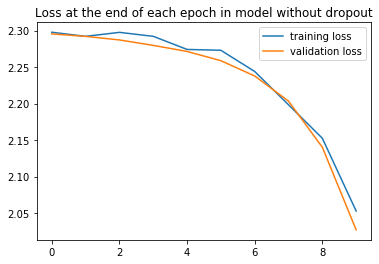

In [30]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch in model without dropout')
plt.legend();

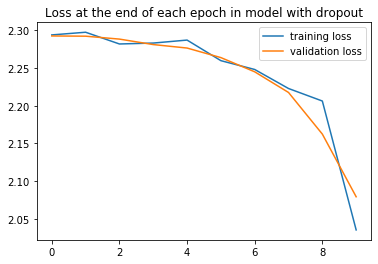

In [31]:
plt.plot(train_losses_d, label='training loss')
plt.plot(test_losses_d, label='validation loss')
plt.title('Loss at the end of each epoch in model with dropout')
plt.legend();

In [32]:
# Test Accuracy
print(test_correct) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(1135), tensor(1135), tensor(1135), tensor(1191), tensor(1178), tensor(3317), tensor(2449), tensor(3187), tensor(4493), tensor(4315)]

Test accuracy: 43.150%


In [33]:
# However, we'd like to compare the predicted values to the ground truth (the y_test labels), so we'll run the test set through the trained model all at once.

# Extract the data all at once, not in batches
test_load_all = torch.utils.data.DataLoader(testset, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model_1layer_s(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(testset)} = {correct.item()*100/(len(testset)):7.3f}%')

Test accuracy: 4315/10000 =  43.150%


In [34]:
# Test Accuracy
print(test_correct_d) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct_d[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(1135), tensor(1527), tensor(1462), tensor(1140), tensor(2221), tensor(2075), tensor(2704), tensor(4010), tensor(3849), tensor(4537)]

Test accuracy: 45.370%


In [35]:
# However, we'd like to compare the predicted values to the ground truth (the y_test labels), so we'll run the test set through the trained model all at once.

# Extract the data all at once, not in batches
test_load_all = torch.utils.data.DataLoader(testset, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model_drop_1layer_s(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(testset)} = {correct.item()*100/(len(testset)):7.3f}%')

Test accuracy: 4529/10000 =  45.290%


## 2Layer Network with Sigmoid Activation

In [36]:
# Without Dropout

torch.manual_seed(101)
model_2layer_s=nn.Sequential(
    nn.Linear(784,256),
    nn.Sigmoid(),
    nn.Linear(256,128),
    nn.Sigmoid(),
    nn.Linear(128,64),
    nn.Sigmoid(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
# Define loss function & optimizer
criterion = nn.CrossEntropyLoss()
optimizer_s=optim.SGD(model_2layer_s.parameters(), lr=0.01,momentum=0.9)

print("Model without dropout:",model_2layer_s)

# With Dropout

model_drop_2layer_s= nn.Sequential(
    nn.Linear(784,256),
    torch.nn.Dropout(0.2),
    nn.Sigmoid(),
    nn.Linear(256,128),
    torch.nn.Dropout(0.2),
    nn.Sigmoid(),
    nn.Linear(128,64),
    torch.nn.Dropout(0.2),
    nn.Sigmoid(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
optimizer_drop_s=optim.SGD(model_drop_2layer_s.parameters(), lr=0.01,momentum=0.9)
print("Model with dropout:",model_drop_2layer_s)

Model without dropout: Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax()
)
Model with dropout: Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): Dropout(p=0.2, inplace=False)
  (2): Sigmoid()
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): Dropout(p=0.2, inplace=False)
  (5): Sigmoid()
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): Dropout(p=0.2, inplace=False)
  (8): Sigmoid()
  (9): Linear(in_features=64, out_features=10, bias=True)
  (10): LogSoftmax()
)


In [37]:
count_parameters(model_2layer_s)

200704
   256
 32768
   128
  8192
    64
   640
    10
______
242762


In [38]:
# Flattening the train data
dataiter = iter(trainloader)
images, labels = dataiter.next()
print('Batch shape:', images.size())

Batch shape: torch.Size([100, 1, 28, 28])


In [39]:
images.view(100,-1).size()

torch.Size([100, 784])

In [40]:
start_time = time.time()

epochs = 10
# Without dropout
train_losses,test_losses=[],[]
train_correct,test_correct = [],[]
acc =[]

for i in range(epochs):
    train = 0
    test = 0
    runningloss = 0

    # Run the training batches on model without dropout
    for b, (X_train, y_train) in enumerate(trainloader):
        b+=1
        
        # Apply the model
        y_pred = model_2layer_s(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train += batch_corr
        
        # Update parameters
        optimizer_s.zero_grad()
        loss.backward()
        optimizer_s.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  accuracy: {train.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(train)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(testloader):

            # Apply the model
            y_val = model_2layer_s(X_test.view(len(X_test), -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(test)

    
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:  0  batch:  200 [ 20000/60000]  loss: 2.30333638  accuracy:  10.770%
epoch:  0  batch:  400 [ 40000/60000]  loss: 2.28122473  accuracy:  10.523%
epoch:  0  batch:  600 [ 60000/60000]  loss: 2.30927968  accuracy:  10.423%
epoch:  1  batch:  200 [ 20000/60000]  loss: 2.30342126  accuracy:  10.400%
epoch:  1  batch:  400 [ 40000/60000]  loss: 2.29832387  accuracy:  10.887%
epoch:  1  batch:  600 [ 60000/60000]  loss: 2.30488229  accuracy:  10.950%
epoch:  2  batch:  200 [ 20000/60000]  loss: 2.29640055  accuracy:  10.925%
epoch:  2  batch:  400 [ 40000/60000]  loss: 2.29842687  accuracy:  10.912%
epoch:  2  batch:  600 [ 60000/60000]  loss: 2.28810811  accuracy:  11.340%
epoch:  3  batch:  200 [ 20000/60000]  loss: 2.29111099  accuracy:  11.845%
epoch:  3  batch:  400 [ 40000/60000]  loss: 2.29971552  accuracy:  12.357%
epoch:  3  batch:  600 [ 60000/60000]  loss: 2.28768682  accuracy:  12.572%
epoch:  4  batch:  200 [ 20000/60000]  loss: 2.28871226  accuracy:  15.685%
epoch:  4  b

In [41]:
#With dropout
start_time = time.time()
print(" Repeating the above steps on model with dropout 0.2")
epochs = 10
train_losses_d,test_losses_d=[],[]
train_correct_d,test_correct_d = [],[]
acc_d =[]
for i in range(epochs):
    train_d = 0
    test_d = 0
    runningloss_d = 0
    
    
    # Run the training batches on model with dropout
    for b, (X_train, y_train) in enumerate(trainloader):
        b+=1
        
        # Apply the model
        y_pred_d = model_drop_2layer_s(X_train.view(100, -1))  # Here we flatten X_train
        loss_d = criterion(y_pred_d, y_train)
 
        # Tally the number of correct predictions
        predicted_d = torch.max(y_pred_d.data, 1)[1]
        batch_corr_d = (predicted_d == y_train).sum()
        train_d += batch_corr_d
        
        # Update parameters
        optimizer_drop_s.zero_grad()
        loss_d.backward()
        optimizer_drop_s.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss_d.item():10.8f}  accuracy: {train_d.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses_d.append(loss_d)
    train_correct_d.append(train_d)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(testloader):

            # Apply the model
            y_val = model_drop_2layer_s(X_test.view(len(X_test), -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted_d = torch.max(y_val.data, 1)[1] 
            test_d += (predicted_d == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss_d = criterion(y_val, y_test)
    test_losses_d.append(loss_d)
    test_correct_d.append(test_d)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

 Repeating the above steps on model with dropout 0.2
epoch:  0  batch:  200 [ 20000/60000]  loss: 2.30100751  accuracy:  11.005%
epoch:  0  batch:  400 [ 40000/60000]  loss: 2.30653930  accuracy:  10.668%
epoch:  0  batch:  600 [ 60000/60000]  loss: 2.30346251  accuracy:  10.658%
epoch:  1  batch:  200 [ 20000/60000]  loss: 2.30169249  accuracy:  10.315%
epoch:  1  batch:  400 [ 40000/60000]  loss: 2.30063844  accuracy:  10.703%
epoch:  1  batch:  600 [ 60000/60000]  loss: 2.30340338  accuracy:  10.730%
epoch:  2  batch:  200 [ 20000/60000]  loss: 2.31454611  accuracy:  10.865%
epoch:  2  batch:  400 [ 40000/60000]  loss: 2.29644203  accuracy:  11.012%
epoch:  2  batch:  600 [ 60000/60000]  loss: 2.28789282  accuracy:  11.082%
epoch:  3  batch:  200 [ 20000/60000]  loss: 2.31208038  accuracy:  11.585%
epoch:  3  batch:  400 [ 40000/60000]  loss: 2.30995131  accuracy:  11.440%
epoch:  3  batch:  600 [ 60000/60000]  loss: 2.28479743  accuracy:  12.022%
epoch:  4  batch:  200 [ 20000/6000

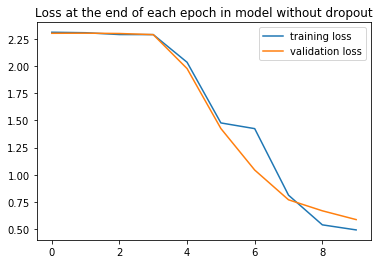

In [42]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch in model without dropout')
plt.legend();

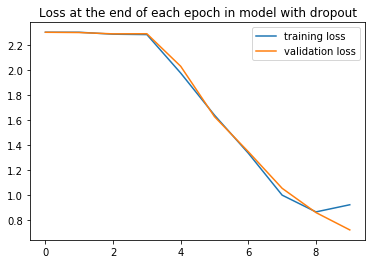

In [43]:
plt.plot(train_losses_d, label='training loss')
plt.plot(test_losses_d, label='validation loss')
plt.title('Loss at the end of each epoch in model with dropout')
plt.legend();

In [44]:
# Test Accuracy
print(test_correct) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(1135), tensor(1063), tensor(1135), tensor(2743), tensor(2918), tensor(4802), tensor(6215), tensor(7617), tensor(8205), tensor(8462)]

Test accuracy: 84.620%


In [45]:
# However, we'd like to compare the predicted values to the ground truth (the y_test labels), so we'll run the test set through the trained model all at once.

# Extract the data all at once, not in batches
test_load_all = torch.utils.data.DataLoader(testset, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model_2layer_s(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(testset)} = {correct.item()*100/(len(testset)):7.3f}%')

Test accuracy: 8462/10000 =  84.620%


In [46]:
# Test Accuracy
print(test_correct_d) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct_d[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(1032), tensor(1048), tensor(1028), tensor(1187), tensor(2480), tensor(3715), tensor(5006), tensor(6672), tensor(7715), tensor(8006)]

Test accuracy: 80.060%


In [47]:
# However, we'd like to compare the predicted values to the ground truth (the y_test labels), so we'll run the test set through the trained model all at once.

# Extract the data all at once, not in batches
test_load_all = torch.utils.data.DataLoader(testset, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model_drop_2layer_s(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(testset)} = {correct.item()*100/(len(testset)):7.3f}%')

Test accuracy: 8054/10000 =  80.540%


In [48]:
torch.manual_seed(101)
model_4_layer_s=nn.Sequential(
    nn.Linear(784,256),
    nn.Sigmoid(),
    nn.Linear(256,128),
    nn.Sigmoid(),
    nn.Linear(128,64),
    nn.Sigmoid(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
optimizer_a=optim.Adam(model_4_layer_s.parameters(), lr=0.01)

print("Model without dropout:",model_4_layer_s)


Model without dropout: Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax()
)


In [49]:
start_time = time.time()

epochs = 10
# Without dropout
train_losses,test_losses=[],[]
train_correct,test_correct = [],[]
acc =[]

for i in range(epochs):
    train = 0
    test = 0
    runningloss = 0

    # Run the training batches on model without dropout
    for b, (X_train, y_train) in enumerate(trainloader):
        b+=1
        
        # Apply the model
        y_pred = model_4_layer_s(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train += batch_corr
        
        # Update parameters
        optimizer_a.zero_grad()
        loss.backward()
        optimizer_a.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  accuracy: {train.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(train)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(testloader):

            # Apply the model
            y_val = model_4_layer_s(X_test.view(len(X_test), -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(test)

    
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.21022236  accuracy:  77.600%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.21039726  accuracy:  85.820%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.13492961  accuracy:  88.970%
epoch:  1  batch:  200 [ 20000/60000]  loss: 0.17487445  accuracy:  96.480%
epoch:  1  batch:  400 [ 40000/60000]  loss: 0.12709317  accuracy:  96.532%
epoch:  1  batch:  600 [ 60000/60000]  loss: 0.04586768  accuracy:  96.580%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.07159826  accuracy:  97.250%
epoch:  2  batch:  400 [ 40000/60000]  loss: 0.10586684  accuracy:  97.385%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.12879032  accuracy:  97.360%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.08654335  accuracy:  97.820%
epoch:  3  batch:  400 [ 40000/60000]  loss: 0.10458511  accuracy:  97.847%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.01931866  accuracy:  97.833%
epoch:  4  batch:  200 [ 20000/60000]  loss: 0.01919621  accuracy:  98.230%
epoch:  4  b

In [0]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Model_name","Number_of_Parameters","Activation_func","Optimizer","Dropout=0.2","Accuracy"]
x.add_row(["model_1layer","218058","ReLU","optim.SGD(model_1layer.parameters(), lr=0.01)","No","92.45"])
x.add_row(["model_drop_1layer","218058","ReLU","optim.SGD(model_drop_1layer.parameters(), lr=0.01)","Yes","90.83"])
x.add_row(["model_2layer","242762","ReLU","optim.SGD(model_2layer.parameters(), lr=0.01)","No","92.37"])
x.add_row(["model_drop_2layer","242762","ReLU","optim.SGD(model_drop_2layer.parameters(), lr=0.01)","Yes","89.75"])
x.add_row(["model_1layer_s","218058","Sigmoid","optim.SGD(model_1layer_s.parameters(), lr=0.01)","No","43.15"])
x.add_row(["model_drop_1layer_s","218058","Sigmoid","optim.SGD(model_drop_1layer_s.parameters(), lr=0.01)","Yes","45.29"])
x.add_row(["model_2layer_s","242762","Sigmoid","optim.SGD(model_2layer_s.parameters(), lr=0.01,momentum=0.9)","No","84.62"])
x.add_row(["model_drop_2layer_s","242762","Sigmoid","optim.SGD(model_drop_2layer_s.parameters(), lr=0.01,momentum=0.9)","Yes","80.54"])
x.add_row(["model_4_layer_s","242762","Sigmoid","optim.Adam(model_4_layer_s.parameters(), lr=0.01)","No","98.64"])


In [56]:
print(x)

+---------------------+----------------------+-----------------+-------------------------------------------------------------------+-------------+----------+
|      Model_name     | Number_of_Parameters | Activation_func |                             Optimizer                             | Dropout=0.2 | Accuracy |
+---------------------+----------------------+-----------------+-------------------------------------------------------------------+-------------+----------+
|     model_1layer    |        218058        |       ReLU      |           optim.SGD(model_1layer.parameters(), lr=0.01)           |      No     |  92.45   |
|  model_drop_1layer  |        218058        |       ReLU      |         optim.SGD(model_drop_1layer.parameters(), lr=0.01)        |     Yes     |  90.83   |
|     model_2layer    |        242762        |       ReLU      |           optim.SGD(model_2layer.parameters(), lr=0.01)           |      No     |  92.37   |
|  model_drop_2layer  |        242762        |      